# **Laboratorio 3: Una introducción al manejo de archivos**
**Facultad de ingeniería**

Departamento de Ingeniería Biomédica

Universidad de los Andes

**IBIO-2340:** Fundamentos de Machine Learning

**Nombres de los integrantes**


1.   Juan Miguel Lebaza Ordoñez
2.   Jose Gabriel Caro Riaño
2.   Juan David Forero Huerfano


**Número del grupo**

5


# **1. Archivos CSV**

Los archivos CSV (Comma Separated Values) son archivos de texto en los que los valores asociados a las variables descritas están separados, por lo general, por una coma (,) aunque también pueden usarse (;) y (|) como delimitadores. Cada nueva observación se separa de la anterior mediante un cambio de linea (\n). Un ejemplo de este tipo de archivo se vería así:

```
variable1,variable2,variable3
1,20,ert
2,40,rty
3,60,uio
```
Este tipo de archivos se utiliza comúnmente para almacenar listas y tablas de datos, por lo que es un formato usual en bases de datos. Se destaca por ser un tipo de archivo ligero y fácil de leer, multiplataforma y que permite almacenar grandes volúmenes de datos. La información que guarda es "plana" por lo que no puede almacenar formatos de datos avanzados como colores, fórmulas o información que involucra carácteres complicados.

Una de las librerias en Python más utilizadas para cargar, procesar y visualizar archivos CSV es *Pandas*. 
Esta libreria permite cargar de forma eficiente y versatil toda la información contenida en este tipo de archivos  en objetos denominados *$DataFrames$*, que ofrecen diferentes métodos y atributos para procesar y visualizar la información.

*Nota:* En general *Pandas* es también compatible con archivos tipo .xsl, .xml, .json y .html. Además funciona muy bien al articularse con otras librerias como *Numpy* y *Matplotlib*.

**Uso de Pandas**


Para cargar archivos CSV desde *Pandas* usamos la función *read_csv()*, que recibe como argumento la ruta del archivo y devuelve un objeto tipo *DataFrame*, tal y como lo muestra el siguiente fragmento:

```
import pandas as pd

df = pd.read_csv("ruta del archivo")
```

Además de la ruta del archivo, la función *read_csv()* admite los siguientes argumentos:

- **sep:** Permite especificar el separador de los valores en las columnas del archivo, por defecto está configurado como "coma" (,).

- **header:** Especifica la fila en el archivo cargado que va a usarse como nombres de columnas en el DataFrame; por defecto se usa 0 (asume que los nombres de las columnas están en la primera fila del archivo).

- **names:** Permite cargar un arreglo con los nombres de las columnas en caso de que se quieran sobreescribir o que el archivo no contenga nombres para sus columnas.

- **index_col:** Permite definir en qué columna se encuentran los valores a usar como índice del DataFrame (en este contexto *índice* se refiere al término utilizado en bases de datos para denotar la columna que contiene la expresión que identifica de forma única cada fila, NO a la operación de indexación de arreglos).

- **usecols:** Especifica qué columnas especificas del archivo va a contener el DataFrame, evitando cargar todas las columnas (que es la configuración por defecto). Este argumento acepta una lista de strings con los nombres de las columnas, en caso de que el archivo tenga columnas con nombres definidos, o una lista de números que indiquen la posición de las columnas a usar si no cuenta con estas etiquetas.

- **nrows:** Indica el número de filas a cargar del archivo. Al pasar un entero N, se cargan las N primeras filas.

Estos son los argumentos más utilizados, no obstante esta función incluye un montón más. Para más información remitase a la documentación: https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html


**1.1. Ejercicios**

El archivo *Heart Attack.csv* [1] contiene la información de 303 observaciones de pacientes corespondientes a distintos parámetros y señales fisiológicas y una columna que establece si el paciente tuvo o no un ataque al corazón.

[1] Archivo elaborado por Sozan S. Maghdid , Tarik A. Rashid en el artículo *An Extensive Dataset for the Heart Disease Classification System.* disponible en [kaggle](https://www.kaggle.com/datasets/pritsheta/heart-attack) y utilizado bajo licencia [Attribution 4.0 International](https://creativecommons.org/licenses/by/4.0/).

1. Cargue el archivo utilizando únicamente las columnas ***age, sex, trestbps, chol*** y ***thalach***.

In [ ]:
import pandas as pd

heart_df = pd.read_csv("Heart Attack Data Set.csv") #se crea un dataFrame al leer el archivo de csv

2. Grafique en una sola figura un histograma que muestre la distribución de las presiones sanguíneas en reposo y un gráfico de barras que muestre la cantidad de hombres y mujeres dentro del dataset. **Nota:** Utilice Pandas y apoyese en Matplotlib, todas las figuras deben tener sus correspondientes etiquetas en los ejes y títulos. Utilice 50 bins en el histograma.

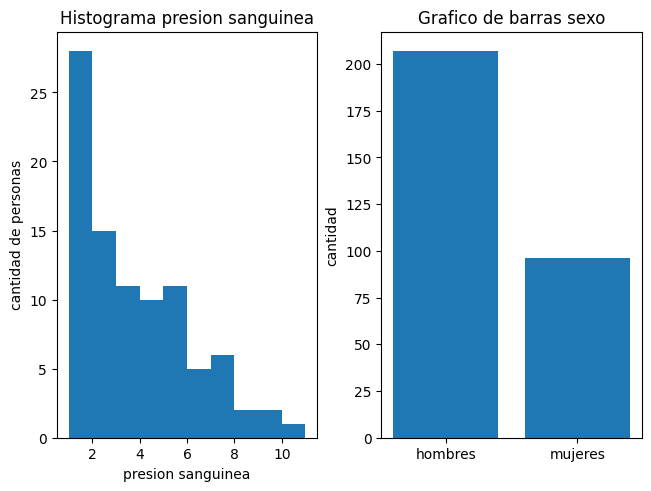

In [55]:
import matplotlib.pyplot as plt 
dataFrameSexo = heart_df["sex"].value_counts() #se crea un subDataFrame con el conteo de elementos distintos de la columna sexo
dataFramePresion = heart_df["thalach"].value_counts() #se crea un subDataFrame con el conteo de elementos distintos de la columna presion sanguinea
figura,ax = plt.subplots(1,2, layout = "constrained") #se crea una figura de tamaño 1x2 para dos elementos(graficas)
ax[0].hist(dataFramePresion) #se crea un histograma con los datos del dataframe
ax[0].set(xlabel="presion sanguinea",ylabel="cantidad de personas",title="Histograma presion sanguinea") #se asignan los nombres de las etiquetas del eje x, el eje y y el titulo del grafico
ax[1].bar(["hombres","mujeres"],dataFrameSexo) #se crea una grafica de barras del dataframe con la informacion de conteos de presion sanguinea
ax[1].set(ylabel="cantidad",title="Grafico de barras sexo") #se asigna una etiqueta en el eje y y el titulo de la grafica de barras
plt.show()


3. En otra figura haga un gráfico de dispersión (scatter de *Pandas*) en donde muestre la relación entre el nivel de colesterol y la edad. Recuerde agregar las etiquetas adecuadas en los ejes y un título representativo.

<Axes: title={'center': 'Grafico de dispersipon niveles de colesterol por edad'}, xlabel='edad', ylabel='nivel de colesterol'>

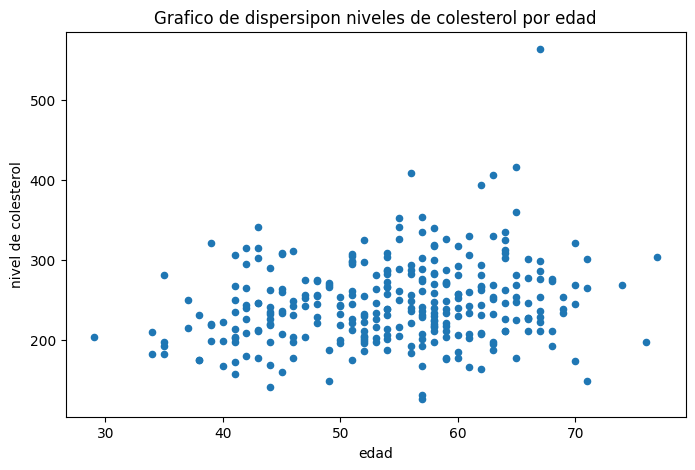

In [57]:
heart_df.plot.scatter(x ="age",y ="chol" ,figsize=(8,5), xlabel="edad", ylabel= "nivel de colesterol",title="Grafico de dispersipon niveles de colesterol por edad")
#la linea superior crea un grafico de dispersion de acuerdo a las columnas de edad y colesterol en el DataFrame original
#se le asigna una etiqueta en x, una etiqueta en y y un titulo


4. En la gráfica del punto anterior incluya la información que se relacionan con la mayor frecuencia cardíaca alcanzada (*thalach*) como una barra de color ("colorbar") sobre los puntos ya graficados . **Hint:** ¿Para qué sirve el argumento *c* en las gráficas de scatter en *Matplotlib*?

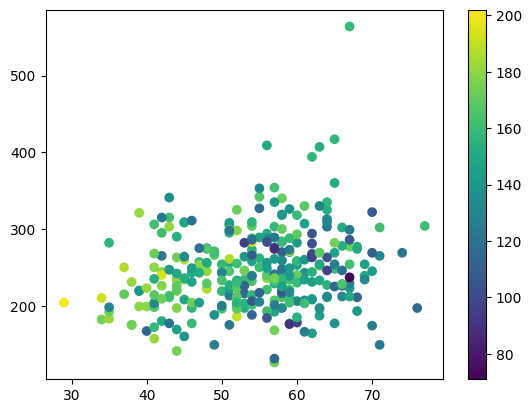

In [79]:
figura ,ax = plt.subplots(1,1)
ax.scatter(heart_df["age"],heart_df["chol"],c= heart_df["thalach"] )
plt.colorbar(ax.collections[0])
plt.show()


# **2. Archivos xlsx**

La extensión $.xlsx$ (Excel Spreadsheet) corresponde al tipo de archivo generado y diseñado en Microsoft Excel basado en XML. Este tipo de archivo permite almacenar datos en hojas de cálculo con múltiples funcionalidades. Entre sus propiedades se destaca que, a diferencia de los archivos CSV, permite almacenar fórmulas, gráficos e incluso estilos (por lo que no se considera un archivo de texto plano). No es tan ligero como los archivos CSV pero es mucho más estructurado y puede contener múltiples hojas de cálculo en un mismo archivo. Es un formato usual en el que algunas bases de datos permiten exportar su información.

La información que contiene este tipo de archivos también pueden cargarse, analizarse y visualizarse usando *Pandas*, con un DataFrame similar al construido para los archivos CSV. En este caso, utilizamos la función *read_excel()* de la siguiente manera:


```
import pandas as pd

excel_df = pd.read_excel("ruta al archivo")
```

Además de la ruta al archivo, algunos argumentos útiles de la función son:

- **sheet_name:** Especifíca el nombre de la hoja de Excel en donde están los datos a cargar, en caso de que no se suministre se utiliza la primera hoja del archivo. Permite pasar un arreglo de nombres de hojas de cálculo si quiere cargarse más de una.

- **header:** Especifica la fila en el archivo cargado que va a usarse como nombres de columnas en el DataFrame; por defecto se usa 0 (asume que los nombres de las columnas están en la primera fila del archivo).

- **names:** Permite cargar un arreglo con los nombres de las columnas en caso de que se quieran sobreescribir o que el archivo no contenga nombres para sus columnas.

- **index_col:** Permite definir en qué columna se encuentran los valores a usar como índice del DataFrame (en este contexto *índice* se refiere al término utilizado en bases de datos para denotar la columna que contiene la expresión que identifica de forma única cada fila, NO a la operación de indexación de arreglos).

- **usecols:** Especifica qué columnas especificas del archivo va a contener el DataFrame, evitando cargar todas las columnas (que es la configuración por defecto). Este argumento acepta una lista de strings con los nombres de las columnas, en caso de que el archivo tenga columnas con nombres definidos, o una lista de números que indiquen la posición de las columnas a usar si no cuenta con estas etiquetas.

- **nrows:** Indica el número de filas a cargar del archivo. Al pasar un entero N, se cargan las N primeras filas.

Tal como en el caso de *read_csv()*, la función *read_excel()* involucra varios argumentos más relacionados con el manejo de archivos $.xslx$ y $.xls$ que pueden consultar en la documentación: https://pandas.pydata.org/docs/reference/api/pandas.read_excel.html#pandas.read_excel

*Nota:* Para cargar este tipo de archivos *Pandas* necesita que se instale adicionalmente la libreria *openpyxl*, que se puede instalar directamente con pip usando el comando:

```
pip install openpyxl
```

**2.1. Ejercicios**

1. Cargue el archivo *data.xlsx* en un DataFrame de *Pandas*, verifique que el archivo no tiene nombres para sus columnas y asigne los nombres "x" y "y" respectivamente.

2. Haga un gráfico de dispersión de las columnas "x" y "y", utilizando un gráfico de tipo **scatter**. Recuerde incluir título y leyendas en los ejes de su gráfica.

3. Incluya en el gráfico anterior la siguiente recta y grafique la distancia que la separa de cada uno de los puntos del gráfico de dispersión. Recuerde incluir un título, las etiquetas en los ejes y usar las leyendas "Medición" para el gráfico de dispersión, "Predicción" para la recta y "Residuo" para las distancias verticales. **Hint:** Utilice la función *vlines()* de matplotlib.

\begin{align}
  y = 5.01x + 0.079
  \end{align}

# **3. Archivos Mat**

El tipo de archivo con extensión $.mat$ son generados desde *MATLAB* para almacenar datos, variables y estructuras complejas. Este tipo de archivo no es un formato de texto sino que se trata de un binario que soporta compresión para optimizar su espacio de almacenamiento (por esta razón no podemos leerlo directamente con un editor de texto).

Por lo general, los archivos $.mat$ se utilizan en procesamientos de señales, simulaciones y análisis numérico. Es un formato común para señales provenientes de procedimientos como electroencefalografías o electromiografías.


**¿Cómo cargar archivos $.mat$ en Python?**

A diferencia de los formatos de texto anteriores, *Pandas* no soporta archivos $.mat$ por lo que no podemos usar Dataframes directamente para contener la información. Sin embargo, podemos cargar la información de este tipo de archivos en Python utilizando la función *loadmat()* que se encuentra en la librería *scipy* al interior del módulo *io*. 

La función *loadmat()* permite cargar la información contenida en un archivo $.mat$ en un *diccionario de Python* incluyendo diferentes metadatos. Veámos como usarla:

```
from scipy.io import loadmat

data = loadmat("ruta_al_archivo.mat")
```

Además de la ruta al archivo, algunos argumentos útiles de la función son:

- **squeeze_me:** Booleano. Si se pasa como True, elimina dimensiones innecesarias en los arreglos cargados de MATLAB (por ejemplo, un arreglo 1x1 de MATLAB se convierte directamente en un escalar de Python)

- **chars_as_strings:** Booleano. Si se pasa como True, convierte arreglos de caracteres de MATLAB en strings de Python.

- **struct_as_record:** Booleano. Si se pasa como True, convierte estructuras de MATLAB en arreglos de Numpy.

- **simplify_cells:** Booleano. Si se pasa como True, convierte celdas de MATLAB en listas o diccionarios de Python.


**3.1. Ejercicios**



1. Cargue el archivo *001N1_ECG.mat* que contiene información sobre el Electrocardiograma (ECG) e Hypnograma tomado de un paciente e identifique las llaves que contiene.

In [97]:
from scipy.io import loadmat
data = loadmat("001N1_ECG.mat", squeeze_me=True,struct_as_record=True) # se cargan los datos del archivo .mat

2. Obtenga la información de la señal de ECG y la frecuencia a la que fue tomada la muestra. **Hint:** Examine las llaves del archivo y encuentre la llave del diccionario que contiene la señal y la frecuencia. Con la información de la frecuencia construya un arreglo de tiempo que contenga los segundos en los que se tomó la señal completa, utilizando la función *np.arange()* (¿Por qué no *linspace()*?) de la siguiente forma:
```
time_ecg = np.arange(0.0, np.size(signal_ecg)/frecuency_ecg, 1/frecuency_ecg)
```


In [108]:
import numpy as np

señal = data['v_ECGSig'].squeeze() #se asigna el arreglo de señales del ECG
frecuencia = data['s_FsHz'] #Se asigna la frecuencia del ECG
time_ecg = np.arange(0.0, np.size(señal)/frecuencia, 1/frecuencia) #se crea un arreglo de tiempo con los segundos correspondientes a cada señal
print(time_ecg)
#dict_keys(['__header__', '__version__', '__globals__', 's_FsHz', 'v_ECGSig', 'v_HypCode', 'v_HypCodeLabels', 'v_HypTime'])

[0.0000000e+00 8.0000000e-03 1.6000000e-02 ... 2.9599784e+04 2.9599792e+04
 2.9599800e+04]


3. En una figura, haga un gráfico para la señal completa y otro que muestre los primeros 15 segundos de la señal. Recuerde incluir las etiquetas en los ejes y títulos.

**Hint:** Para obtener la longitud correcta de los arreglos de tiempo y señal que representan los primeros 15 segundos de la medición, calcule el número de muestras que se han tomado durante los primeros 15 segundos haciendo uso del valor de la frecuencia (¿cúantas muestras se han tomado en 15 segundos si cada una se toma durante (1/frecuencia) segundos?). Este número de muestras corresponde al número de elementos a considerar en el arreglo de la señal y del tiempo. 

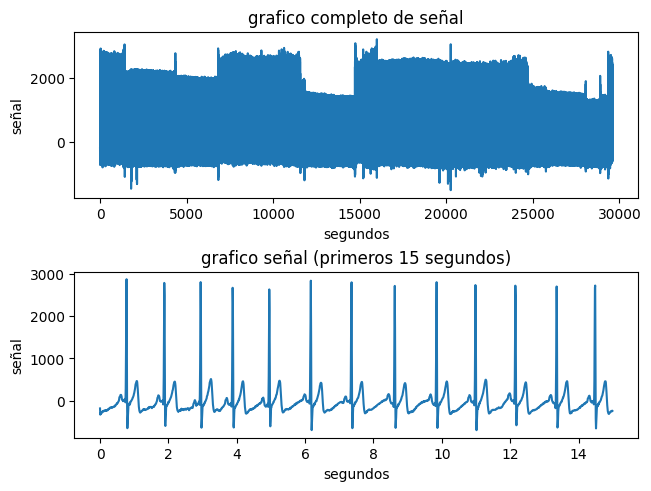

In [ ]:
figura,ax = plt.subplots(2,1, layout = "constrained") #se crea la figura donde se graficaran los datos de señal
quince_segundos = frecuencia*15 #se calcula el valor de la frecuencia para los primeros 15 segundos basado en que la frecuencia es po segundo
ax[0].plot(time_ecg,señal)# se grafica la señal completa usando los dos arreglos de tiempo y señal creador en el punto anterior
ax[0].set(xlabel="segundos", ylabel="señal",title="grafico completo de señal") #se asignan las etiquetas para x,y y para el titulo de la grafica
ax[1].plot(time_ecg[:quince_segundos],señal[:quince_segundos]) # se grafica la señal en los primeros 15 segundos usando los dos arreglos de tiempo y señal creador en el punto anterior y un slice de ambos arreglos hasta el valor de la frecuencia de 15 segundos
ax[1].set(xlabel="segundos", ylabel="señal",title="grafico señal (primeros 15 segundos)") #se asignan las etiquetas para x,y y para el titulo de la grafica

plt.show()

# **4.Archivos txt**

Este tipo de archivo es el más simple, constituye un archivo de texto plano que solo almacena caracteres sin formato especial o una estructura específica. Los archivos $.txt$ sn generados desde algún editor de texto como bloc de notas, entre otros. Se destaca por ser el más fácil de leer, por ser uno de los más ligeros y por su versátilidad, casi cualquier programa puede abrir un archivo de este tipo. Por lo general, se utiliza para almacenar logs (resultados de ciertos procesos computacionales, historiales, ...), configuraciones y datos simples.

**¿Cómo cargar archivos $.txt$ en Python?**

Debido a su carencia de estructura, bastaría con utilizar la función *open()* con la opción para lectura *"r"* integrada en Python para recuperar la información que contienen. Sin embargo para nuestro contexto específico vamos a asumir que este tipo de archivos contiene, en general, arreglos de datos numéricos por lo que nos resulta más conveniente utilizar la función *load_txt()* de *Numpy*. 

*NumPy* permite cargar arreglos desde archivos $.txt$ pasando como argumento el caracter separador de valores. Una restricción a tener en cuenta en este caso es que la función *load_txt()* únicamente permite leer arrays en 1 o 2 dimensiones.

Para cargar un arreglo de números de un archivo $.txt$ se haciendo uso de la función *np.loadtxt()* seguimos la siguiente sintáxis:

```
arreglo_txt = np.loadtxt("ruta_del_archivo")
```

La función *loadtxt()* cuenta con los siguientes parámetros adicionales:

- **fname:** Nombre del archivo a cargar (ruta del archivo).

- **delimiter:** Caracter con el que están separados los números de arreglo (por defecto se utiliza espacio " ").

- **skiprows:** Lista que incluye los índices de las filas que se desea evitar en la carga (aquello que no se incluiran en el arreglo cargado).

- **usecols:** Lista de las columnas del archivo que se desea cargar.

- **encoding:** Codificador utilizado para leer el archivo.



**4.1. Ejercicios**

1. Cargue el archivo "arrays_txt.txt", imprima la dimensión del arreglo, el número de filas y columnas y el número de elementos que contiene.

2. Calcule e imprima la transpuesta, el determinante y los valores y vectores propios de la matriz.

*Nota:* Para imprimir los autovalores y autovectores utilice el siguiente formato: 
  Eigenvalor 1: valor, Eigenvector 1: $[1,2...]$

# **5. Generación de archivos**

Python no solo puede leer archivos en distintos formatos sino que tambien puede generarlos, esto es, podemos guardar la información que hemos utilizado en un archivo de texto.

Para ello, vamos a utilizar la función *savetxt()* de *NumPy* que nos permite almacenar distintos arreglos en un archivo $.txt$. La síntesis de código para usar la función *savetxt()* se describe a continuación:

```
np.savetxt("nombre_del_archivo", arreglo)
```

Algunos argumentos útiles son:

- **delimiter:** Caracter utilizado para separar los números del arreglo (por defecto es espacio (" ")).

- **header:** Cadena de texto que se desea ingresar al inicio del archivo (por ejemplo: 'Arreglos NumPy')

- **footer:** Cadena de texto que se desea ingresar al final del archivo.



**5.1. Ejercicios**

1. Genere 50 matrices de tamaño (10,10) de números enteros aleatorios y guárdelas en archivos $.txt$ dentro de una carpeta con nombre "matrices_numpy". Cada archivo de texto debe tener el nombre "matriz_XX.txt" donde XX es el número consecutivo de cada matriz creada. Al finalizar, debería tener una carpeta con nombre "matrices_numpy" y dentro 50 archivos $.txt$, cada uno conteniendo los datos numéricos de cada matriz.

**Hint:** Utilice el módulo *os* nativo en Python para crear la carpeta y para recuperar la ruta a la misma.

2. Imprima en pantalla la cantidad de archivos dentro de la carpeta "matrices_numpy". **Hint:** La función *listdir* puede ser de utilidad en este caso.

  **Nota:** El mensaje impreso debe tener el formato: 'La cantidad de archivos en el directorio X es Y.'